In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import linear_model

In [2]:
dataset_dir = 'Dataset_Final/Dataset_unido.csv' #Se carga el dataset
df = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
df #Se imprime el dataset

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero,Incidencia
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,2.0,0.000024
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,2.0,0.000825
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,2.0,0.026520
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,2.0,0.033072
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,2.0,0.024737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,1.0,0.014034
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,1.0,0.005350
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,1.0,0.061390
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,1.0,0.006413


La correlacion del dataframe es: 
                       CodDepartamento           Ano  Trimestre  \
CodDepartamento           1.000000e+00 -2.976779e-18   0.000000   
Ano                      -2.976779e-18  1.000000e+00   0.000000   
Trimestre                 0.000000e+00  0.000000e+00   1.000000   
PorcentajeDesempleo       8.169607e-02 -3.902343e-01  -0.135475   
Temperatura               1.009003e-01 -9.328458e-02  -0.184481   
Precipitacion            -2.951208e-02  3.689262e-02   0.127605   
PIB                      -2.620028e-01  2.096711e-02   0.000000   
retail_and_recreation     4.203230e-02  5.903276e-01   0.298218   
grocery_and_pharmacy     -9.277230e-02  6.779377e-01   0.382025   
parks                    -7.504929e-02  4.954936e-01   0.254297   
transit_stations         -3.827684e-02  4.543638e-01   0.186010   
workplaces               -5.258210e-03  5.516437e-01   0.225749   
residential              -8.968919e-02 -4.841843e-01  -0.077886   
PorcentajeVacunacion      1.

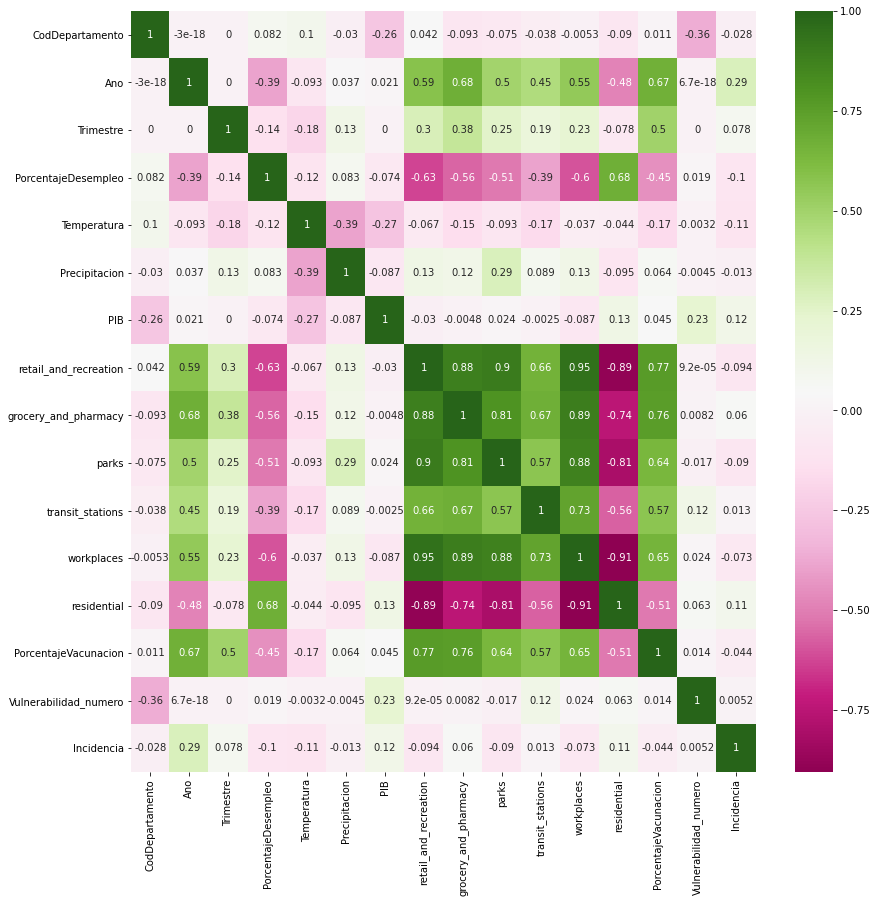

In [3]:
corr_df = df.corr(method="pearson")
print("La correlacion del dataframe es: ")
print(corr_df,"\n")
plt.figure(figsize=(14, 14))
sns.heatmap(corr_df,cmap = 'PiYG', annot=True)
plt.show()

La correlacion del dataframe es: 
                       CodDepartamento       Ano  Trimestre  \
CodDepartamento               1.000000  0.000000   0.000000   
Ano                           0.000000  1.000000   0.000000   
Trimestre                     0.000000  0.000000   1.000000   
PorcentajeDesempleo           0.091138 -0.365949  -0.139743   
Temperatura                   0.163243 -0.098294  -0.145827   
Precipitacion                 0.071478  0.029508   0.149869   
PIB                          -0.208560  0.078200   0.000000   
retail_and_recreation         0.054763  0.560443   0.242905   
grocery_and_pharmacy         -0.059989  0.713428   0.369653   
parks                        -0.039491  0.471171   0.224162   
transit_stations             -0.055066  0.438482   0.153942   
workplaces                    0.012041  0.533756   0.204326   
residential                  -0.099629 -0.437717  -0.047741   
PorcentajeVacunacion         -0.001727  0.925829   0.255542   
Vulnerabilidad_numero

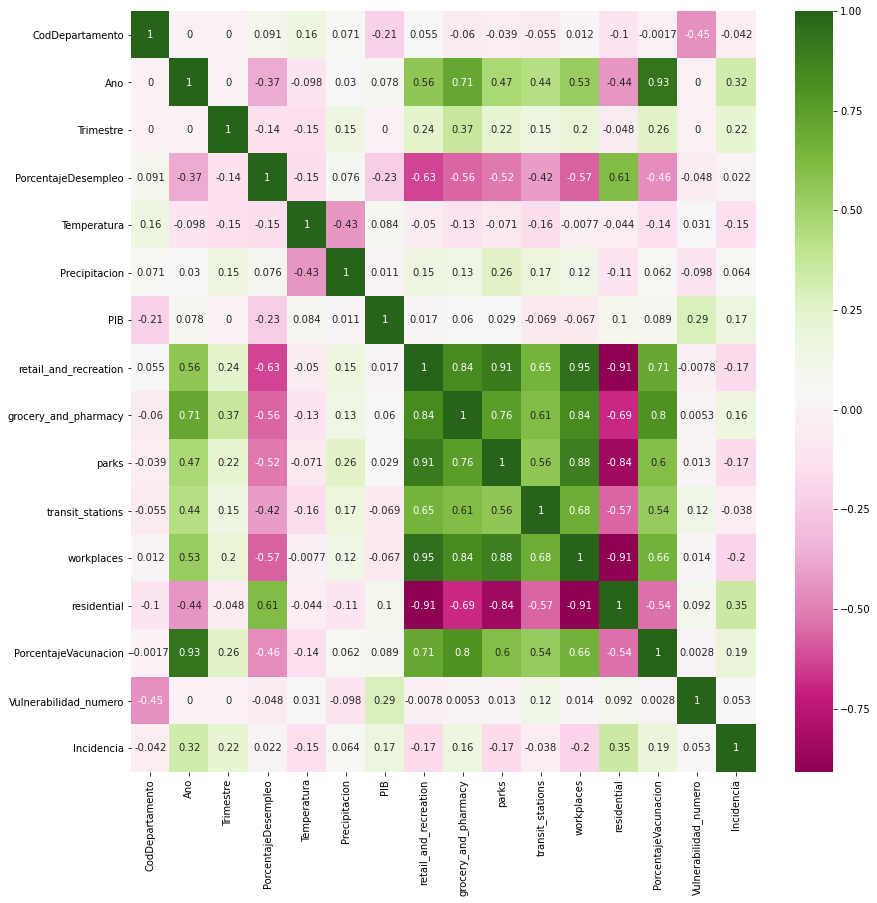

In [4]:
corr_df = df.corr(method="spearman")
print("La correlacion del dataframe es: ")
print(corr_df,"\n")
plt.figure(figsize=(14, 14))
sns.heatmap(corr_df, cmap = 'PiYG', annot=True)
plt.show()

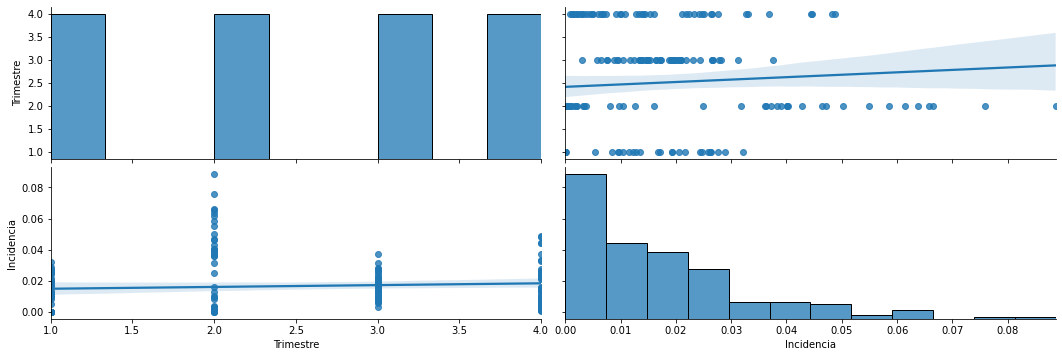

In [5]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(df_dataset_c, x_vars=["CASA","CASA","APTO","TIP_CUARTO","VIV_TRAD_INDIG","1-DOR","1-FALL","2-PER","Fall_Mujer","Per_edad_20 a 24","Indigena","Lee_y_Escribe"], y_vars='Vulnerabilidad_numero', size=20, aspect=1, kind='reg')
sns.pairplot(df, vars=["Trimestre",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

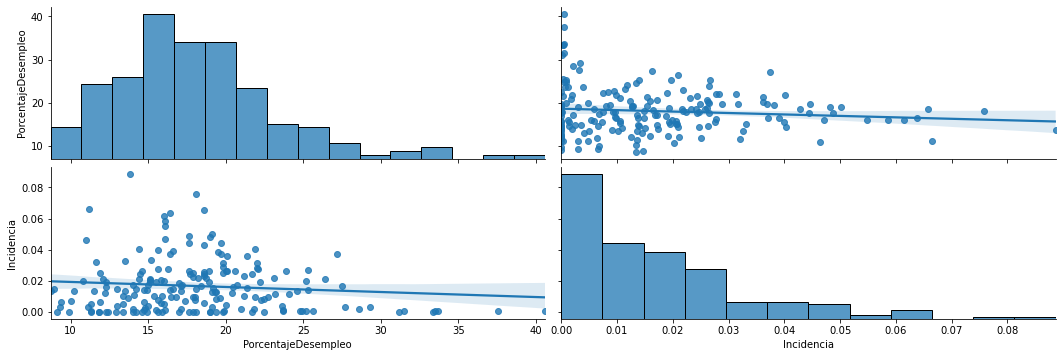

In [6]:
sns.pairplot(df, vars=["PorcentajeDesempleo",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

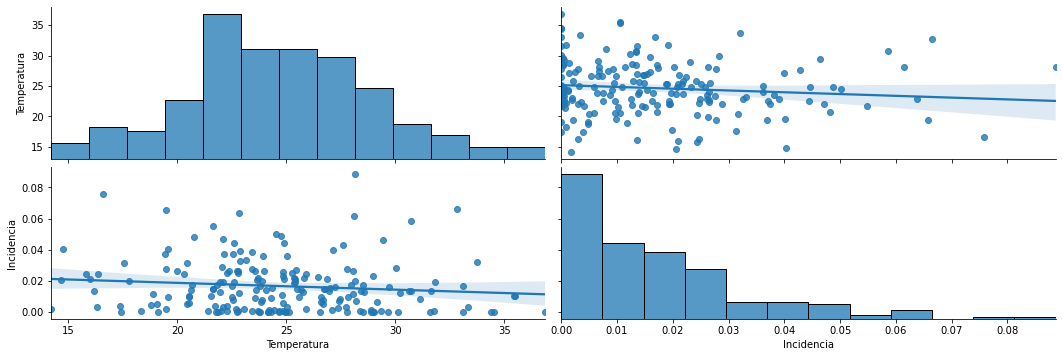

In [7]:
sns.pairplot(df, vars=["Temperatura",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

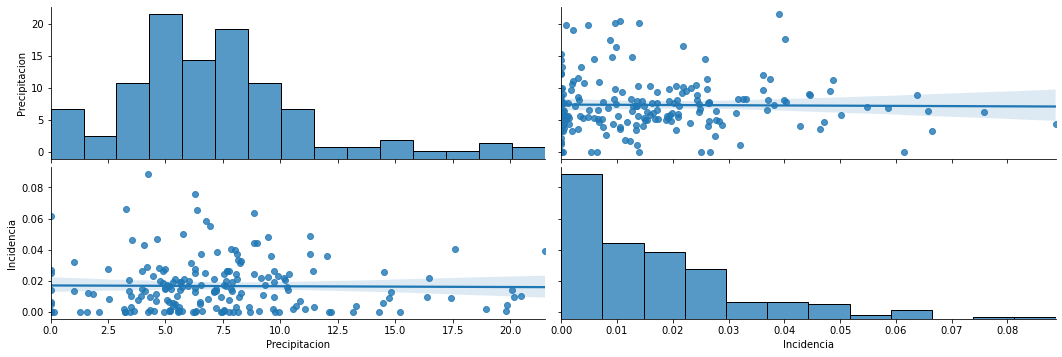

In [8]:
sns.pairplot(df, vars=["Precipitacion",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

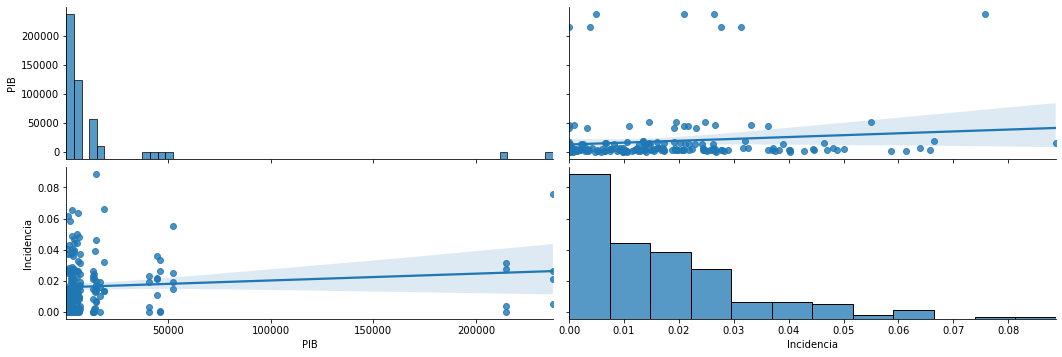

In [9]:
sns.pairplot(df, vars=["PIB",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

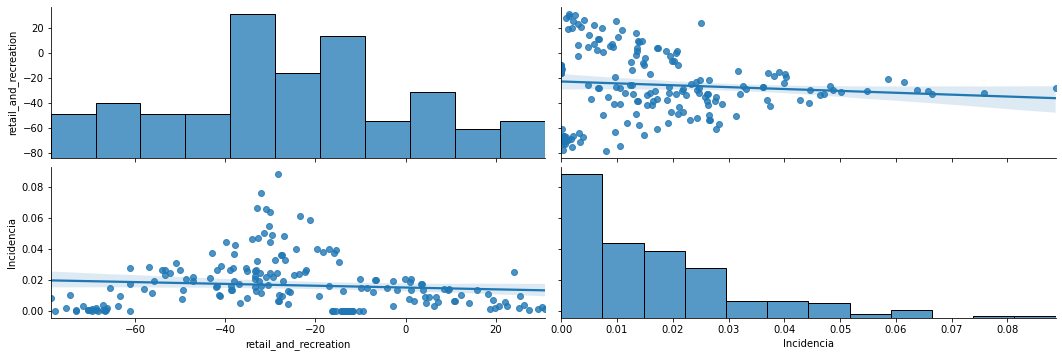

In [10]:
sns.pairplot(df, vars=["retail_and_recreation",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

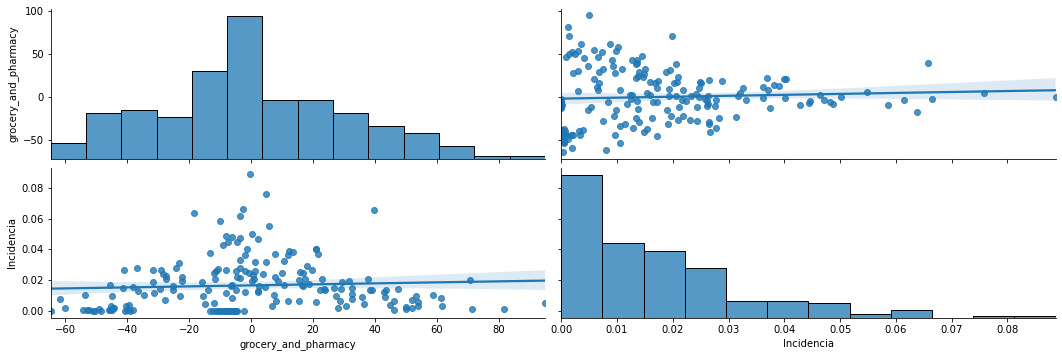

In [11]:
sns.pairplot(df, vars=["grocery_and_pharmacy",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

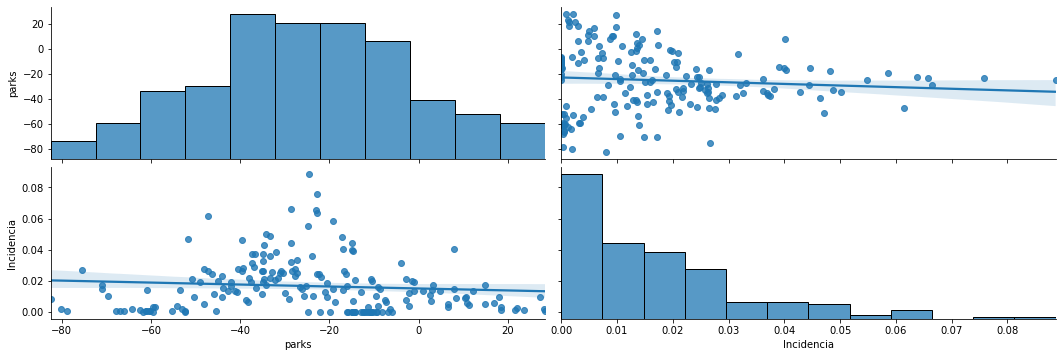

In [12]:
sns.pairplot(df, vars=["parks",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

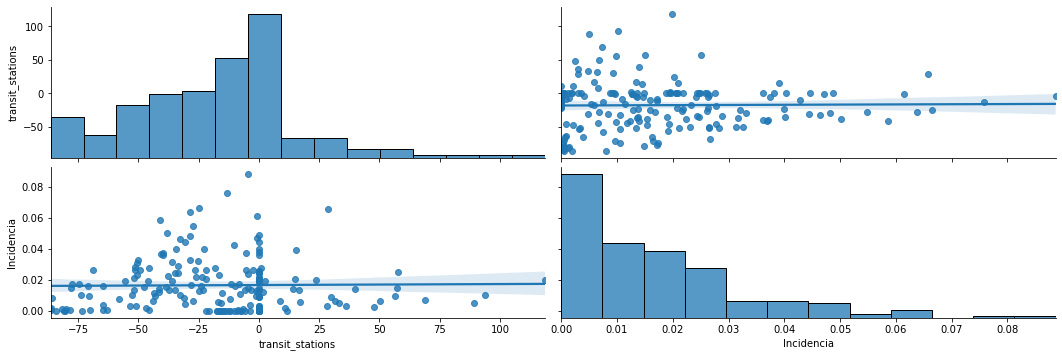

In [13]:
sns.pairplot(df, vars=["transit_stations",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

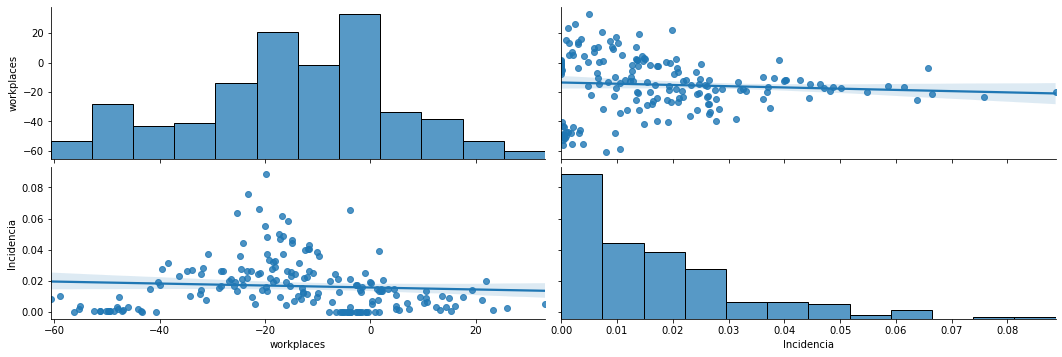

In [14]:
sns.pairplot(df, vars=["workplaces",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

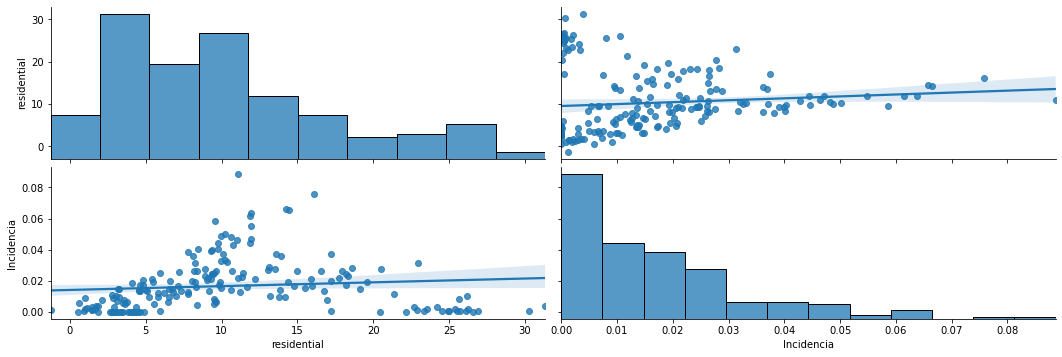

In [15]:
sns.pairplot(df, vars=["residential",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

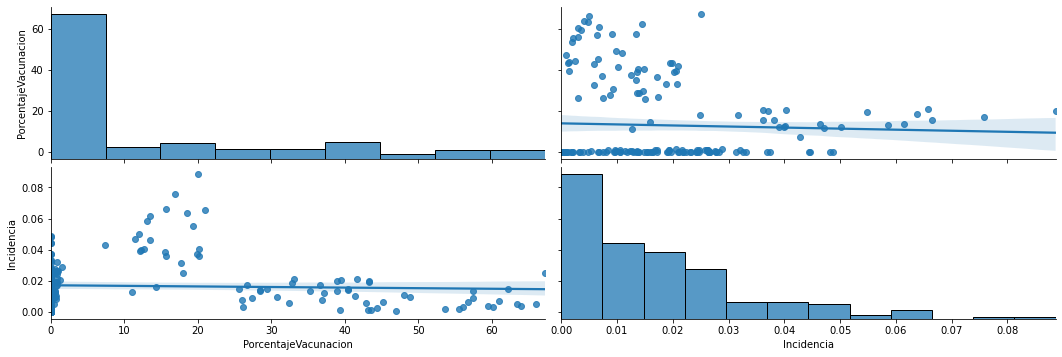

In [16]:
sns.pairplot(df, vars=["PorcentajeVacunacion",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

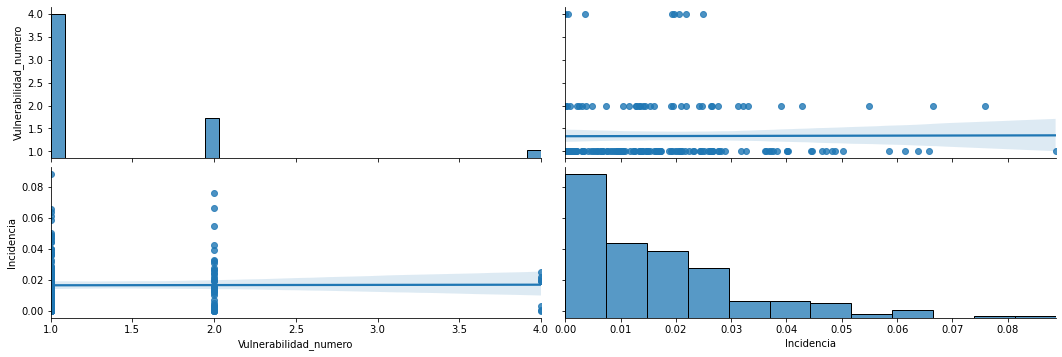

In [17]:
sns.pairplot(df, vars=["Vulnerabilidad_numero",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()